In [2]:
import cv2
import scipy.signal as signal
import scipy.fft as fft

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio

from skimage.color import rgb2gray
from align_image_code import align_images

<h2>Part 1</h2>

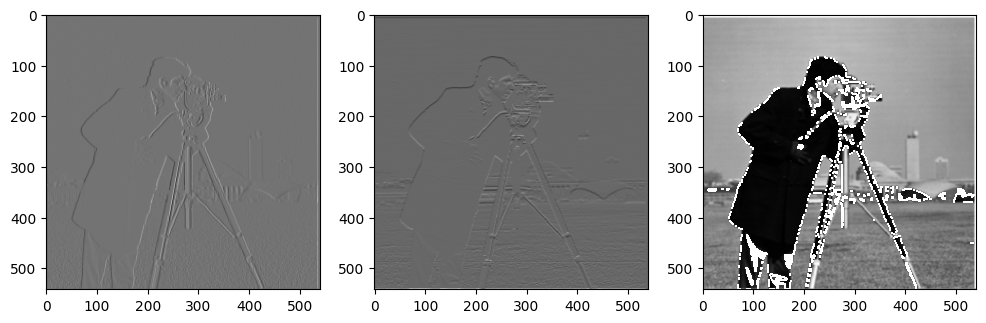

In [9]:
# Q1.1
%matplotlib inline

# Partial x and y derivatives

img = skio.imread("../images/cameraman.png")
img = rgb2gray(img[:,:,:3])
# plt.imshow(img)

D_x = np.tile(np.array([1,-1])[None,:], [2, 1])
D_y = np.tile(np.array([1,-1]).T[:,None], [1, 2])

# Dx
img_D_x = signal.convolve2d(img, D_x, mode="same")
# Dy
img_D_y = signal.convolve2d(img, D_y, mode="same")

# # TODO: Edge Filtering
edge_D_x = np.tile(np.array([1,0,-1])[None,:], [3, 1])
edge_D_y = np.tile(np.array([1,0,-1]).T[:,None], [1, 3])
# edge_conv_x = signal.convolve2d(img, edge_D_x, mode="same")
# edge_conv_y = signal.convolve2d(img, edge_D_y, mode="same")

gradient_mag = np.sqrt((edge_D_x**2) + (edge_D_y**2))
# TODO: idk how to apply this
# gradient_dir = np.arctan(edge_D_y.T/edge_D_x)
img_edge = signal.convolve2d(img, gradient_mag, mode="same")
img_binarize = np.ma.masked_inside(img_edge, 2, 2.4, copy=True)
# print(img_binarize)

plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(img_D_x, cmap="gray")
plt.subplot(132); plt.imshow(img_D_y, cmap="gray")
plt.subplot(133); plt.imshow(img_binarize, cmap="gray")

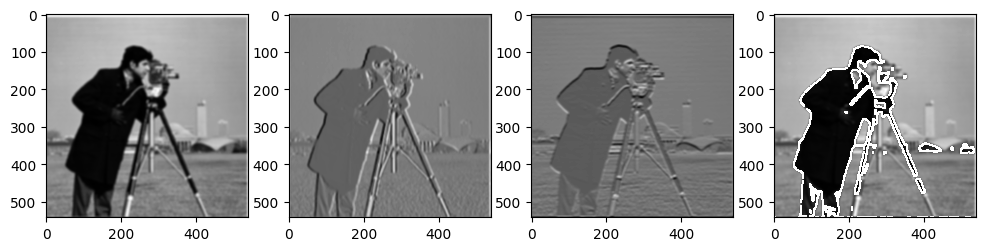

In [7]:
# Q1.2
# Gaussian Kernel
gauss_2d_kernel = cv2.getGaussianKernel(10, 3) * cv2.getGaussianKernel(10, 3).T

# Convolution
img_gauss = signal.convolve2d(img, gauss_2d_kernel, mode="same")

# Gauss D_x
gauss_D_x = signal.convolve2d(gauss_2d_kernel, D_x, mode="same")
img_gauss_D_x = signal.convolve2d(img, gauss_D_x, mode="same")

# Gauss D_y
gauss_D_y = signal.convolve2d(gauss_2d_kernel, D_y, mode="same")
img_gauss_D_y = signal.convolve2d(img, gauss_D_y, mode="same")

# TODO: Gauss Edge Filtering
gauss_img_edge = signal.convolve2d(img_gauss, gradient_mag, mode="same")
gauss_img_binarize = np.ma.masked_inside(gauss_img_edge, 2, 2.4, copy=True)
# TODO: idk how to apply this
# gradient_dir = np.arctan(edge_D_y.T/edge_D_x)

plt.figure(figsize=(12, 4))
plt.subplot(141); plt.imshow(img_gauss, cmap="gray")
plt.subplot(142); plt.imshow(img_gauss_D_x, cmap="gray")
plt.subplot(143); plt.imshow(img_gauss_D_y, cmap="gray")
plt.subplot(144); plt.imshow(gauss_img_binarize, cmap="gray")

Differences: The gaussian filter applied on the partial derivatives x and y retain different brightness values, whereas the regularly convoluted images are converted to a single grayscale color.

TODO: Add diff for edge filtering

<h2>Part 2</h2>

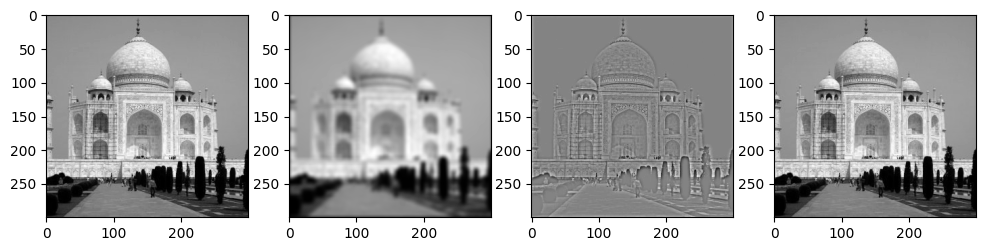

In [ ]:
# Q 2.1
img = skio.imread("../images/taj.jpg")
img = rgb2gray(img[:,:,:3])

img_gauss = signal.convolve2d(img, gauss_2d_kernel, mode="same")
details = img - img_gauss
alpha = 1
img_sharpened = img_gauss + (alpha * details)

# TODO: Add custom images

plt.figure(figsize=(12, 4))
plt.subplot(141); plt.imshow(img, cmap="gray")
plt.subplot(142); plt.imshow(img_gauss, cmap="gray")
plt.subplot(143); plt.imshow(details, cmap="gray")
plt.subplot(144); plt.imshow(img_sharpened, cmap="gray")

In [ ]:
# Q2.2

# First load images

# high sf
im1 = plt.imread('../images/DerekPicture.jpg')/255

# low sf
im2 = plt.imread('../images/nutmeg.jpg')/255

%matplotlib qt5

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im1, im2)
im1_aligned, im2_aligned = rgb2gray(im1_aligned), rgb2gray(im2_aligned)

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

def create_gaussian_kernel(ksize, sigma):
    return cv2.getGaussianKernel(ksize, sigma) * cv2.getGaussianKernel(ksize, sigma).T

def hybrid_image(im1, im2, sigma1, sigma2):
    print(im1.shape)
    print(im2.shape)
    im1_lp_filter = signal.convolve2d(im1, create_gaussian_kernel(2, sigma1), mode="same")
    im2_hp_filter = im2 - signal.convolve2d(im2, create_gaussian_kernel(20, sigma2), mode="same")
    return im1_lp_filter + im2_hp_filter

sigma1 = 5
sigma2 = 10
hybrid = hybrid_image(im1_aligned, im2_aligned, sigma1, sigma2)

plt.imshow(hybrid)
plt.show

# ## Compute and display Gaussian and Laplacian Pyramids
# ## You also need to supply this function
# N = 5 # suggested number of pyramid levels (your choice)
# pyramids(hybrid, N)

plt.imshow(hybrid)

Please select 2 points in each image for alignment.
(1347, 737)
(1347, 737)
